<a href="https://colab.research.google.com/github/PHYS-3510-SPRING-2026/hello-world-Raygarza1243/blob/main/homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def move_euler(k, m, pos, vel, dt):
    # Forward Euler: evaluates derivatives at the CURRENT state
    # Both position and velocity use values from the beginning of the timestep
    # This causes the system to gain energy over time (amplitude grows)
    pos_new = pos + vel * dt                # Update position using current velocity
    vel_new = vel + (-k/m * pos) * dt       # Update velocity using current position
    return pos_new, vel_new

def move_semi_euler(k, m, pos, vel, dt):
    # Symplectic Euler: updates velocity first, then uses NEW velocity for position
    # This interleaving causes errors to cancel out, conserving energy over long times
    # Also called "semi-implicit Euler" or "Euler-Cromer method"
    vel += -k/m * pos * dt    # Update velocity using current position
    pos += vel * dt           # Update position using the NEW velocity (just calculated)
    return pos, vel

def move_implicit_euler(k, m, pos, vel, dt):
    # Implicit (Backwards) Euler: uses the FUTURE state to evaluate derivatives (implicit method)
    # This requires solving an equation to find the new velocity
    # For simple harmonic motion, we can solve analytically (shown below)
    # This causes the system to lose energy over time (amplitude decays)

    # Mathematical derivation:
    # pos_new = pos + vel_new * dt
    # vel_new = vel - k/m * pos_new * dt
    # Substituting first equation into second:
    # vel_new = vel - k/m * (pos + vel_new * dt) * dt
    # Rearranging: vel_new * (1 + k/m * dt²) = vel - k/m * pos * dt
    # Therefore:
    denom = 1 + (k/m) * dt**2
    vel = (vel - (k/m) * pos * dt) / denom   # Solve for new velocity
    pos = pos + vel * dt                      # Update position using new velocity
    return pos, vel

def move_RK2(k, m, pos, vel, dt):
    # Runge-Kutta 2nd order (RK2): evaluates derivatives at the MIDPOINT of the timestep
    # More accurate than Euler methods because it uses better estimate of slope
    # Also called "explicit midpoint method"

    # Step 1: Calculate acceleration at current position
    acc = -k/m * pos

    # Step 2: Estimate velocity at the halfway point in time
    vel_half = vel + acc * dt/2

    # Step 3: Estimate position at the halfway point using half-step velocity
    pos_half = pos + vel * dt/2

    # Step 4: Calculate acceleration at the midpoint position
    acc_half = -k/m * pos_half

    # Step 5: Take full step using the midpoint estimates
    pos = pos + vel_half * dt      # Full position update using midpoint velocity
    vel = vel + acc_half * dt      # Full velocity update using midpoint acceleration

    return pos, vel

def energy(k, m, x, v):
    return 0.5 * k * x**2 + 0.5 * m * v**2

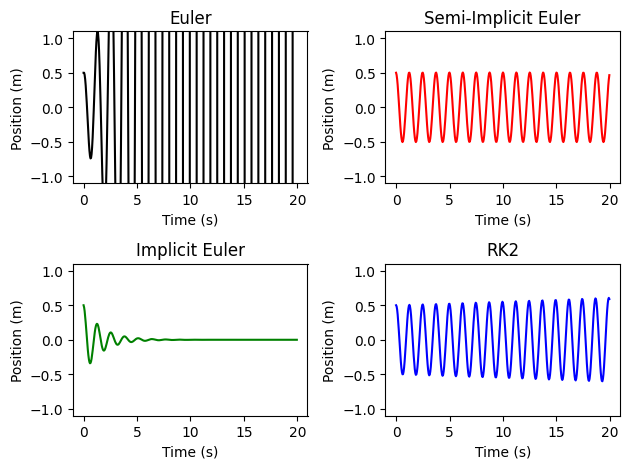

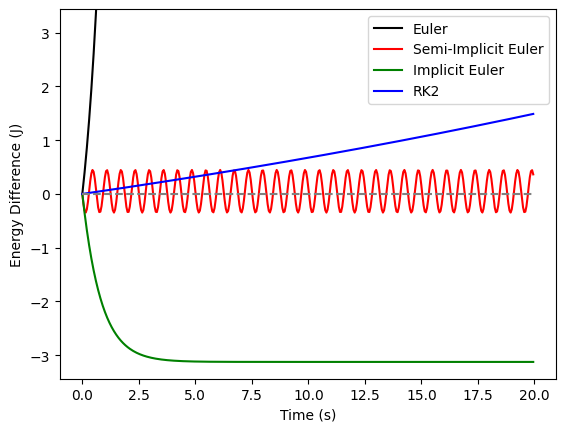

In [3]:
dt = 0.05 # in seconds
t_range = np.arange(0,20,dt)

k = 25.0
m = 1.0

xpos=0.5
xvel=0

xpos_euler = [xpos]
xvel_euler = [xvel]
xpos_semi_euler = [xpos]
xvel_semi_euler = [xvel]
xpos_implicit_euler = [xpos]
xvel_implicit_euler = [xvel]
xpos_rk2 = [xpos]
xvel_rk2 = [xvel]

for t in t_range:
    xpos, xvel = move_euler(k, m, xpos_euler[-1], xvel_euler[-1], dt)
    xpos_euler.append(xpos)
    xvel_euler.append(xvel)
    xpos, xvel = move_semi_euler(k, m, xpos_semi_euler[-1], xvel_semi_euler[-1], dt)
    xpos_semi_euler.append(xpos)
    xvel_semi_euler.append(xvel)
    xpos, xvel = move_implicit_euler(k, m, xpos_implicit_euler[-1], xvel_implicit_euler[-1], dt)
    xpos_implicit_euler.append(xpos)
    xvel_implicit_euler.append(xvel)
    xpos, xvel = move_RK2(k, m, xpos_rk2[-1], xvel_rk2[-1], dt)
    xpos_rk2.append(xpos)
    xvel_rk2.append(xvel)

xpos_euler.pop()  # Remove the last element which is at t=20
xvel_euler.pop()
xpos_semi_euler.pop()
xvel_semi_euler.pop()
xpos_implicit_euler.pop()
xvel_implicit_euler.pop()
xpos_rk2.pop()
xvel_rk2.pop()

xpos_euler = np.array(xpos_euler)
xpos_semi_euler = np.array(xpos_semi_euler)
xpos_implicit_euler = np.array(xpos_implicit_euler)
xpos_rk2 = np.array(xpos_rk2)
xvel_euler = np.array(xvel_euler)
xvel_semi_euler = np.array(xvel_semi_euler)
xvel_implicit_euler = np.array(xvel_implicit_euler)
xvel_rk2 = np.array(xvel_rk2)

energy_euler = energy(k, m, xpos_euler, xvel_euler) - energy(k, m, xpos_euler[0], xvel_euler[0])  # Energy relative to initial energy
energy_semi_euler = energy(k, m, xpos_semi_euler, xvel_semi_euler) - energy(k, m, xpos_semi_euler[0], xvel_semi_euler[0])
energy_implicit_euler = energy(k, m, xpos_implicit_euler, xvel_implicit_euler) - energy(k, m, xpos_implicit_euler[0], xvel_implicit_euler[0])
energy_rk2 = energy(k, m, xpos_rk2, xvel_rk2) - energy(k, m, xpos_rk2[0], xvel_rk2[0])

ymin = 1.1*np.min(energy_implicit_euler)
ymax = abs(ymin)

fig, ax = plt.subplots(2,2)
ax[0,0].plot(t_range, xpos_euler, 'k-')
ax[0,1].plot(t_range, xpos_semi_euler, 'r-')
ax[1,0].plot(t_range, xpos_implicit_euler, 'g-')
ax[1,1].plot(t_range, xpos_rk2, 'b-')
ax[0,0].set_title('Euler')
ax[0,1].set_title('Semi-Implicit Euler')
ax[1,0].set_title('Implicit Euler')
ax[1,1].set_title('RK2')
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel('Time (s)')
        ax[i,j].set_ylabel('Position (m)')
        ax[i,j].set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1)
ax.plot(t_range, energy_euler, label='Euler', color='k')
ax.plot(t_range, energy_semi_euler, label='Semi-Implicit Euler', color='r')
ax.plot(t_range, energy_implicit_euler, label='Implicit Euler', color='g')
ax.plot(t_range, energy_rk2, label='RK2', color='b')
ax.hlines(0, t_range[0], t_range[-1], colors='gray', linestyles='dashed')  # Reference line for zero energy difference
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Energy Difference (J)')
ax.legend()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# 2D PLANETARY MOTION - Gravitational Force
# ============================================================================
# Physical system: A planet orbits a star under gravitational attraction
# Force: F = -GMm/r² in the direction toward the star
# This creates elliptical (or circular) orbits
#
# Position: (x, y) - 2D coordinates
# Velocity: (vx, vy) - 2D velocity components
# Acceleration: a = -GM * r_hat / r²  where r_hat = (x,y)/r is unit vector
# ============================================================================

def gravitational_acceleration(x, y, GM):
    """
    Calculate gravitational acceleration toward origin.

    Parameters:
    -----------
    x, y : float
        Position coordinates
    GM : float
        Gravitational parameter (G * M_star)

    Returns:
    --------
    ax, ay : float
        Acceleration components
    """
    r = np.sqrt(x**2 + y**2)  # Distance from star
    r3 = r**3
    ax = -GM * x / r3  # Acceleration in x direction
    ay = -GM * y / r3  # Acceleration in y direction
    return ax, ay

def move_euler_2d(x, y, vx, vy, GM, dt):
    """
    Forward Euler for 2D motion.
    Evaluates all derivatives at CURRENT state.
    Energy tends to INCREASE over time (orbit spirals outward).
    """
    # Calculate acceleration at current position
    ax, ay = gravitational_acceleration(x, y, GM)

    # Update position and velocity using current values
    x_new = x + vx * dt       # Update position using current velocity
    y_new = y + vy * dt
    vx_new = vx + ax * dt     # Update velocity using current acceleration
    vy_new = vy + ay * dt

    return x_new, y_new, vx_new, vy_new

def move_semi_euler_2d(x, y, vx, vy, GM, dt):
    """
    Symplectic Euler for 2D motion.
    Updates velocity first, then uses NEW velocity for position.
    Conserves energy well - BEST for long-term orbit simulations.
    This is the standard method used in astronomy and N-body simulations.
    """
    # Calculate acceleration at current position
    ax, ay = gravitational_acceleration(x, y, GM)

    # Update velocity first using current position
    vx += ax * dt
    vy += ay * dt

    # Update position using NEW velocity (just calculated)
    x += vx * dt
    y += vy * dt

    return x, y, vx, vy

def move_RK2_2d(x, y, vx, vy, GM, dt):
    """
    Runge-Kutta 2nd order (explicit midpoint) for 2D motion.
    Evaluates acceleration at MIDPOINT of timestep.
    More accurate than Euler methods, good energy conservation.
    """
    # Step 1: Calculate acceleration at current position
    ax, ay = gravitational_acceleration(x, y, GM)

    # Step 2: Estimate velocity at midpoint
    vx_half = vx + ax * dt/2
    vy_half = vy + ay * dt/2

    # Step 3: Estimate position at midpoint using half-step velocity
    x_half = x + vx_half * dt/2
    y_half = y + vy_half * dt/2

    # Step 4: Calculate acceleration at midpoint position
    ax_half, ay_half = gravitational_acceleration(x_half, y_half, GM)

    # Step 5: Take full step using midpoint estimates
    x_new = x + vx_half * dt
    y_new = y + vy_half * dt
    vx_new = vx + ax_half * dt
    vy_new = vy + ay_half * dt

    return x_new, y_new, vx_new, vy_new

def orbital_energy(x, y, vx, vy, m, GM):
    """
    Calculate total orbital energy.

    E_total = (1/2)m*v² - GMm/r

    Kinetic energy: (1/2)m*v²  (always positive)
    Potential energy: -GMm/r   (negative because gravity is attractive)

    For a bound orbit, total energy should be negative and constant.
    In an ideal system with perfect integration, energy would not change.
    """
    v_squared = vx**2 + vy**2
    r = np.sqrt(x**2 + y**2)

    kinetic = 0.5 * m * v_squared
    potential = -GM * m / r

    return kinetic + potential


In [5]:
# ============================================================================
# SIMULATION AND VISUALIZATION
# ============================================================================

# Physical parameters
GM = 4 * np.pi**2  # Gravitational parameter (in AU³/year² units)
                   # With this choice, a circular orbit at 1 AU has period = 1 year
m = 1.0            # Planet mass (arbitrary units)

# Initial conditions for circular orbit
# Place planet at x=1 AU, y=0
# Give it velocity in y-direction for circular motion: v = sqrt(GM/r) = 2π
x0, y0 = 1.0, 0.0
vx0, vy0 = 0.0, 2*np.pi  # Orbital speed for 1 year period

# Simulation parameters
dt = 0.01          # Time step (in years)
t_max = 10.0       # Simulate for n orbits
n_steps = int(t_max / dt)

# Run all three methods
methods = [
    ("Forward Euler", move_euler_2d),
    ("Symplectic Euler", move_semi_euler_2d),
    ("RK2", move_RK2_2d)
]


Forward Euler       : Energy drift = -66.86%
Symplectic Euler    : Energy drift = -0.00%
RK2                 : Energy drift = -0.57%

Orbit comparison plot saved as 'planetary_orbits_comparison.png'


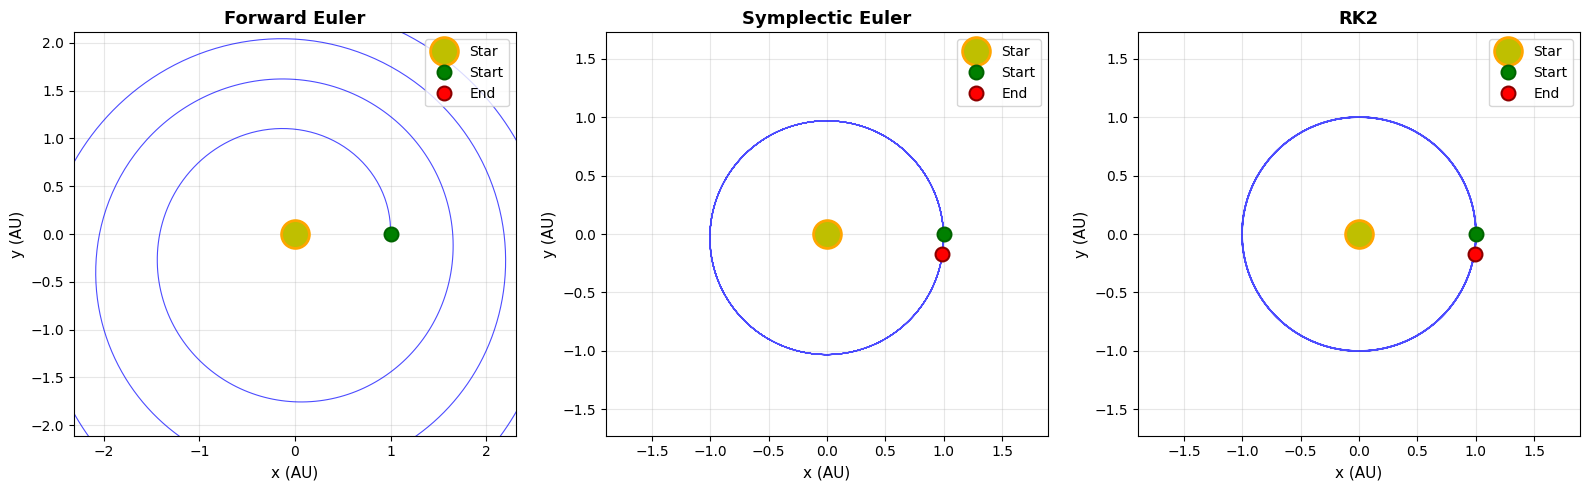

In [6]:
# ============================================================================
# PLOT ORBITS
# ============================================================================
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (method_name, method_func) in enumerate(methods):
    # Initialize
    x, y = x0, y0
    vx, vy = vx0, vy0

    # Storage
    x_history = [x]
    y_history = [y]
    energy_history = [orbital_energy(x, y, vx, vy, m, GM)]

    # Simulate
    for step in range(n_steps):
        x, y, vx, vy = method_func(x, y, vx, vy, GM, dt)
        x_history.append(x)
        y_history.append(y)
        energy_history.append(orbital_energy(x, y, vx, vy, m, GM))

    # Plot orbit
    ax = axes[idx]
    ax.plot(x_history, y_history, 'b-', linewidth=0.8, alpha=0.7)
    ax.plot(0, 0, 'yo', markersize=20, label='Star', markeredgecolor='orange', markeredgewidth=2)
    ax.plot(x0, y0, 'go', markersize=10, label='Start', markeredgecolor='darkgreen', markeredgewidth=1.5)
    ax.plot(x_history[-1], y_history[-1], 'ro', markersize=10, label='End', markeredgecolor='darkred', markeredgewidth=1.5)

    # Format
    ax.set_xlabel('x (AU)', fontsize=11)
    ax.set_ylabel('y (AU)', fontsize=11)
    ax.set_title(f'{method_name}', fontsize=13, fontweight='bold')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

    # Set consistent axis limits
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # Print energy drift
    E0 = energy_history[0]
    E_final = energy_history[-1]
    energy_drift = (E_final - E0) / E0 * 100
    print(f"{method_name:20s}: Energy drift = {energy_drift:+.2f}%")

plt.tight_layout()
plt.savefig('planetary_orbits_comparison.png', dpi=150, bbox_inches='tight')
print("\nOrbit comparison plot saved as 'planetary_orbits_comparison.png'")
plt.show()


Energy evolution plot saved as 'energy_evolution.png'


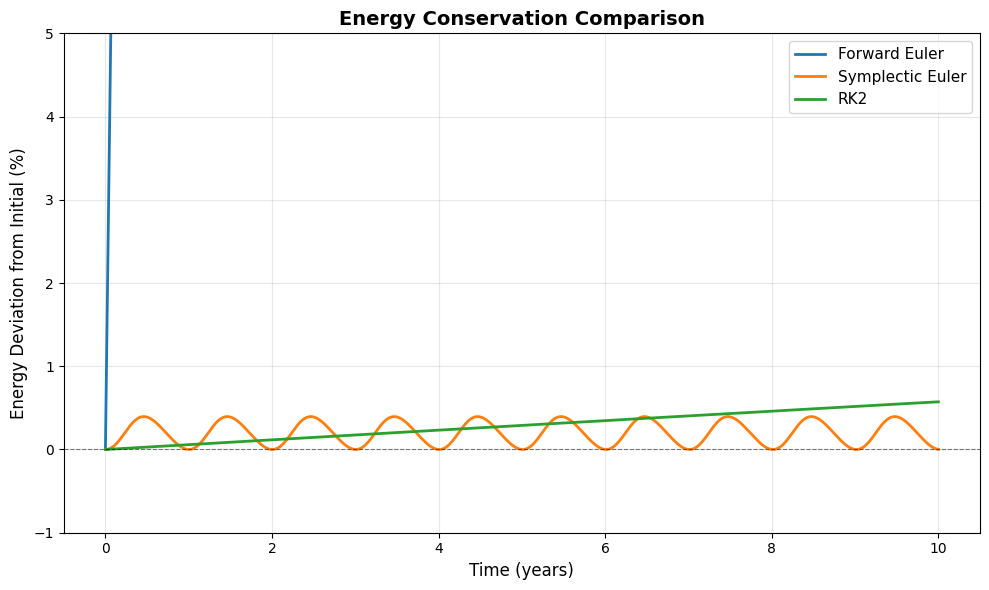


SUMMARY OF METHODS FOR ORBITAL MECHANICS

Forward Euler:
  - Simplest method, but energy increases over time
  - Orbit spirals outward, eventually escapes
  - NOT recommended for orbital simulations

Symplectic Euler:
  - Energy stays bounded (small oscillations)
  - Orbit remains stable indefinitely
  - GOLD STANDARD for N-body and orbital simulations
  - Used in professional astronomy codes

RK2 (Explicit Midpoint):
  - Better accuracy than Euler methods
  - Good energy conservation
  - More expensive (2 force evaluations per step)
  - Good choice when accuracy is more important than speed



In [7]:
# ============================================================================
# ENERGY EVOLUTION PLOT
# ============================================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
time = np.arange(0, t_max + dt, dt)

for method_name, method_func in methods:
    x, y = x0, y0
    vx, vy = vx0, vy0
    energy_history = [orbital_energy(x, y, vx, vy, m, GM)]

    for step in range(n_steps):
        x, y, vx, vy = method_func(x, y, vx, vy, GM, dt)
        energy_history.append(orbital_energy(x, y, vx, vy, m, GM))

    # Normalize energy to show percentage deviation from initial
    E0 = energy_history[0]
    energy_deviation = [(E - E0)/abs(E0) * 100 for E in energy_history]

    ax.plot(time, energy_deviation, label=method_name, linewidth=2)

ax.set_xlabel('Time (years)', fontsize=12)
ax.set_ylabel('Energy Deviation from Initial (%)', fontsize=12)
ax.set_title('Energy Conservation Comparison', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)

plt.ylim(-1, 5)
plt.tight_layout()
plt.savefig('energy_evolution.png', dpi=150, bbox_inches='tight')
print("Energy evolution plot saved as 'energy_evolution.png'")
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*60)
print("SUMMARY OF METHODS FOR ORBITAL MECHANICS")
print("="*60)
print("\nForward Euler:")
print("  - Simplest method, but energy increases over time")
print("  - Orbit spirals outward, eventually escapes")
print("  - NOT recommended for orbital simulations")
print("\nSymplectic Euler:")
print("  - Energy stays bounded (small oscillations)")
print("  - Orbit remains stable indefinitely")
print("  - GOLD STANDARD for N-body and orbital simulations")
print("  - Used in professional astronomy codes")
print("\nRK2 (Explicit Midpoint):")
print("  - Better accuracy than Euler methods")
print("  - Good energy conservation")
print("  - More expensive (2 force evaluations per step)")
print("  - Good choice when accuracy is more important than speed")
print("\n" + "="*60)